In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/1_cleaned_heart_attack_data.csv')
dataset.head()

,ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours,Income,BMI,Triglycerides,Activity per Week,Sleeping Hours,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8763 non-null   object 
 1   Age                      8763 non-null   int64  
 2   Sex                      8763 non-null   object 
 3   Cholesterol              8763 non-null   int64  
 4   Blood Pressure           8763 non-null   object 
 5   Heart Rate               8763 non-null   int64  
 6   Diabetes                 8763 non-null   int64  
 7   Family History           8763 non-null   int64  
 8   Smoking                  8763 non-null   int64  
 9   Obesity                  8763 non-null   int64  
 10  Alcohol Consumption      8763 non-null   int64  
 11  Exercise Hours Per Week  8763 non-null   float64
 12  Diet                     8763 non-null   object 
 13  Previous Heart Problems  8763 non-null   int64  
 14  Medication Use          

In [4]:
num_cols  = dataset.select_dtypes(include=['int64', 'float64']).columns

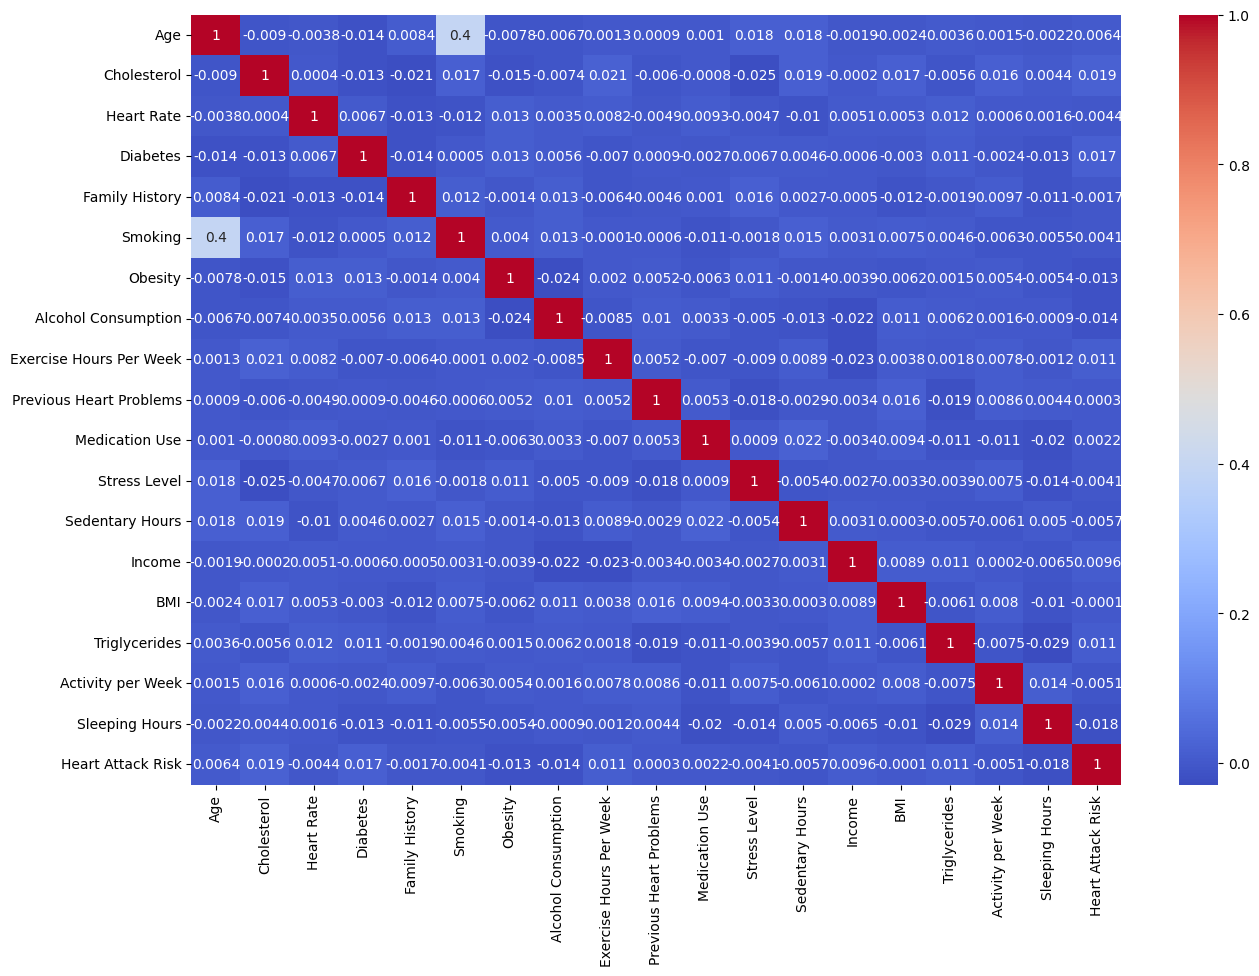

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset[num_cols].corr(method='spearman').round(4), annot=True, cmap='coolwarm')
plt.show()


In [6]:
# Split the systolic and dystolic
dataset[['Systolic', 'Diastolic']] = dataset['Blood Pressure'].str.split('/', expand=True)
dataset['Systolic'] = dataset['Systolic'].astype(int)
dataset['Diastolic'] = dataset['Diastolic'].astype(int)
dataset.drop('Blood Pressure', axis=1, inplace=True)

Since BMI has very low correlation with the target variable which is the 'Heart Attack Risk', we can drop this column.

In [7]:
dataset.drop('BMI', axis=1, inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8763 non-null   object 
 1   Age                      8763 non-null   int64  
 2   Sex                      8763 non-null   object 
 3   Cholesterol              8763 non-null   int64  
 4   Heart Rate               8763 non-null   int64  
 5   Diabetes                 8763 non-null   int64  
 6   Family History           8763 non-null   int64  
 7   Smoking                  8763 non-null   int64  
 8   Obesity                  8763 non-null   int64  
 9   Alcohol Consumption      8763 non-null   int64  
 10  Exercise Hours Per Week  8763 non-null   float64
 11  Diet                     8763 non-null   object 
 12  Previous Heart Problems  8763 non-null   int64  
 13  Medication Use           8763 non-null   int64  
 14  Stress Level            

We can also drop ID, since this is just the patient ID for information only.

In [9]:
dataset.drop('ID', axis=1, inplace=True)

Feature Encoding

Since there are low correlations among the features, combining features can sometimes reveal new relationships or capture interactions that are not apparent wh en considering individual features alone. 

In [10]:
dataset['Age_HeartRate'] = dataset['Age'] * dataset['Heart Rate']
dataset['Obesity_SedentaryHours'] = dataset['Obesity'] + dataset['Sedentary Hours']

In [11]:
dataset['Continent'] = dataset['Continent'].astype(str)
dataset['Hemisphere'] = dataset['Hemisphere'].astype(str)

In [12]:
dataset['Continent_Hemisphere'] = dataset['Continent'] + '_' + dataset['Hemisphere']
dataset.drop(['Continent', 'Hemisphere', 'Age', 'Heart Rate', 'Obesity', 'Sedentary Hours'],\
              axis=1, inplace=True)

In [13]:
dataset

,Sex,Cholesterol,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,...,Triglycerides,Activity per Week,Sleeping Hours,Country,Heart Attack Risk,Systolic,Diastolic,Age_HeartRate,Obesity_SedentaryHours,Continent_Hemisphere
0,Male,208,0,0,1,0,4.168189,Average,0,0,...,286,0,6,Argentina,0,158,88,4824,6.615001,South America_Southern Hemisphere
1,Male,389,1,1,1,1,1.813242,Unhealthy,1,0,...,235,1,7,Canada,0,165,93,2058,5.963459,North America_Northern Hemisphere
2,Female,324,1,0,0,0,2.078353,Healthy,1,1,...,587,4,4,France,0,174,99,1512,9.463426,Europe_Northern Hemisphere
3,Male,383,1,1,1,1,9.828130,Average,1,0,...,378,3,4,Canada,0,163,100,6132,7.648981,North America_Northern Hemisphere
4,Male,318,1,1,1,0,5.804299,Unhealthy,1,0,...,231,1,5,Thailand,0,91,88,6138,2.514821,Asia_Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Male,121,1,1,1,1,7.917342,Healthy,1,1,...,67,7,7,Thailand,0,94,76,3660,10.806373,Asia_Northern Hemisphere
8759,Female,120,1,0,0,0,16.558426,Healthy,0,0,...,617,4,9,Canada,0,157,102,2044,4.833038,North America_Northern Hemisphere
8760,Male,250,0,1,1,1,3.148438,Average,1,0,...,527,4,4,Brazil,1,161,75,4935,3.375214,South America_Southern Hemisphere
8761,Male,178,1,0,1,0,3.789950,Unhealthy,1,1,...,114,2,8,Brazil,0,119,67,2160,0.029104,South America_Southern Hemisphere


In [14]:
from sklearn.preprocessing import LabelEncoder

non_numerical_cols = dataset.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in non_numerical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [15]:
dataset

,Sex,Cholesterol,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,...,Triglycerides,Activity per Week,Sleeping Hours,Country,Heart Attack Risk,Systolic,Diastolic,Age_HeartRate,Obesity_SedentaryHours,Continent_Hemisphere
0,1,208,0,0,1,0,4.168189,0,0,0,...,286,0,6,0,0,158,88,4824,6.615001,8
1,1,389,1,1,1,1,1.813242,2,1,0,...,235,1,7,3,0,165,93,2058,5.963459,6
2,0,324,1,0,0,0,2.078353,1,1,1,...,587,4,4,6,0,174,99,1512,9.463426,4
3,1,383,1,1,1,1,9.828130,0,1,0,...,378,3,4,3,0,163,100,6132,7.648981,6
4,1,318,1,1,1,0,5.804299,2,1,0,...,231,1,5,16,0,91,88,6138,2.514821,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1,121,1,1,1,1,7.917342,1,1,1,...,67,7,7,16,0,94,76,3660,10.806373,2
8759,0,120,1,0,0,0,16.558426,1,0,0,...,617,4,9,3,0,157,102,2044,4.833038,6
8760,1,250,0,1,1,1,3.148438,0,1,0,...,527,4,4,2,1,161,75,4935,3.375214,8
8761,1,178,1,0,1,0,3.789950,2,1,1,...,114,2,8,2,0,119,67,2160,0.029104,8


In [16]:
from imblearn.over_sampling import SMOTE

X = dataset.drop('Heart Attack Risk', axis=1)
y = dataset['Heart Attack Risk']

In [17]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)

(11248, 21) (11248,)


In [18]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

In [19]:
resampled_class_distribution = (y_resampled.value_counts() / len(y_resampled))
print(resampled_class_distribution)

Heart Attack Risk
0    0.5
1    0.5
Name: count, dtype: float64


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit(X_resampled)


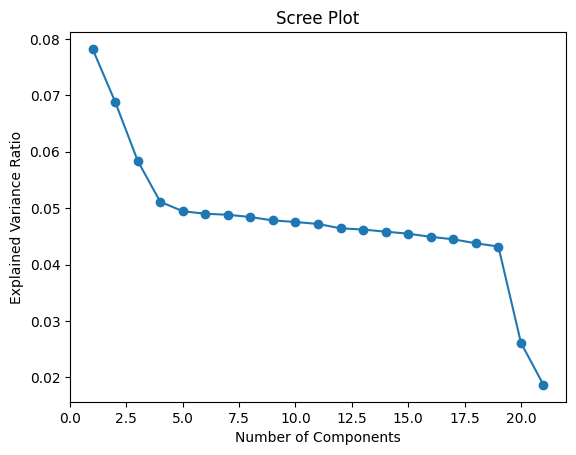

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

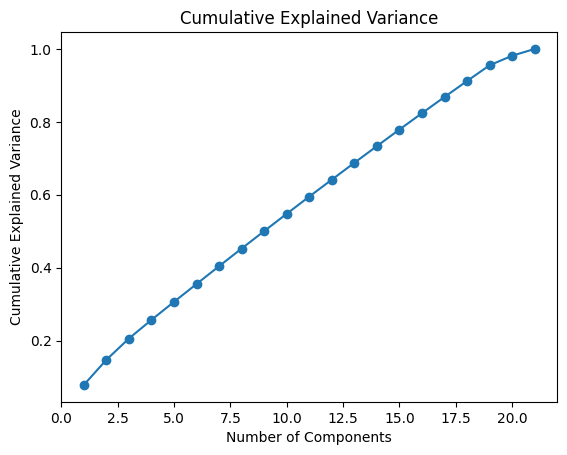

In [23]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [24]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X_resampled)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.0782418  0.06888061 0.05841351 0.05113072 0.04945546 0.04901053
 0.04882571 0.04842984 0.04781763 0.04754696 0.04719182 0.04642663
 0.04620618 0.04582673 0.04547233 0.04491251]
Cumulative explained variance ratio: 0.82378897689712


After performing PCA, the explained variance ratio is not that high to be able to reduce the dimensionality from 22. So we retain the current dimensions for now.

In [26]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Heart Attack Risk'] = y_resampled

In [27]:
resampled_df.to_csv('data/2_resampled_heart_attack_data.csv', index=False)